In [1]:
%cd ..

/home/mounim/PHD-Projects/GES


In [2]:
#pip install matplotlib numpy pandas seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import random
import sys
from itertools import combinations
import scipy.cluster.hierarchy as shc
from Bio.pairwise2 import format_alignment
from src import dataset_simulator
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from Bio import pairwise2
from Bio import Align

In [3]:
## Binary tree
### N generations
version = "logarithmic_dataset"
L = 100 # len of sequence
mutation_rate = 0.01
generations = 6 # N = g!
random_sequence = dataset_simulator.generate_random_seq(L) #sequence of lenght L
# make binary dataset 
simulated_dataset = dataset_simulator.make_binray_tree(random_sequence, generations = generations, mutation_rate = mutation_rate, mutation_types='S', distribution = 'logarithmic')

dataset_simulator.dict_to_fasta(simulated_dataset , './data/'+version+'/' , filename = version)


83
206
2257
34
727
181
331
243
70
23
354
193
234
83
100
29
165
63
235
51
98
530
174
624
58
234
229
559
8
61
146
152
69
126
218
55
42
115
239
92
74
105
252
51
218
22
21
227
2821
165
281
126
277
198
591
20
61
358
289
159
41
441
92
168
18
67
247
528
35
70
78
290
115
119
62
76
70
293
126
119
52
194
208
97
74
106
120
277
72
31
21
1696
325
262
509
60
51
213
44
11
112
371
9
248
39
577
47
164
58
141
181
38
142
283
45
11
217
47
21
166
33
30
53
13
43
78


# TEST DATA

Gen2:N4:  Gen1:N1
Gen5:N37:  Gen4:N18
Gen5:N44:  Gen4:N21
Gen5:N57:  Gen0:N0
Gen5:N61:  Gen4:N30
Gen6:N63:  Gen1:N1
Gen6:N65:  Gen1:N1
Gen6:N66:  Gen1:N1
Gen6:N69:  Gen4:N16
Gen6:N70:  Gen4:N16
Gen6:N71:  Gen1:N1
Gen6:N75:  Gen5:N37
Gen6:N76:  Gen5:N37
Gen6:N77:  Gen4:N18
Gen6:N81:  Gen5:N40
Gen6:N84:  Gen5:N41
Gen6:N89:  Gen5:N44
Gen6:N90:  Gen5:N44
Gen6:N91:  Gen3:N10
Gen6:N96:  Gen5:N47
Gen6:N97:  Gen0:N0
Gen6:N99:  Gen0:N0
Gen6:N100:  Gen0:N0
Gen6:N103:  Gen4:N25
Gen6:N105:  Gen4:N25
Gen6:N112:  Gen0:N0
Gen6:N115:  Gen5:N57
Gen6:N116:  Gen5:N57
Gen6:N119:  Gen4:N29
Gen6:N121:  Gen4:N29
Gen6:N122:  Gen4:N29
Gen6:N123:  Gen5:N61
Gen6:N124:  Gen5:N61
Gen6:N125:  Gen4:N30
Gen6:N126:  Gen4:N30


/tmp/ipykernel_1109371/2338273375.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1109371/2338273375.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1109371/2338273375.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1109371/2338273375.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1109371/2338273375.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

0.6285714285714284


(2.0, 3.0)

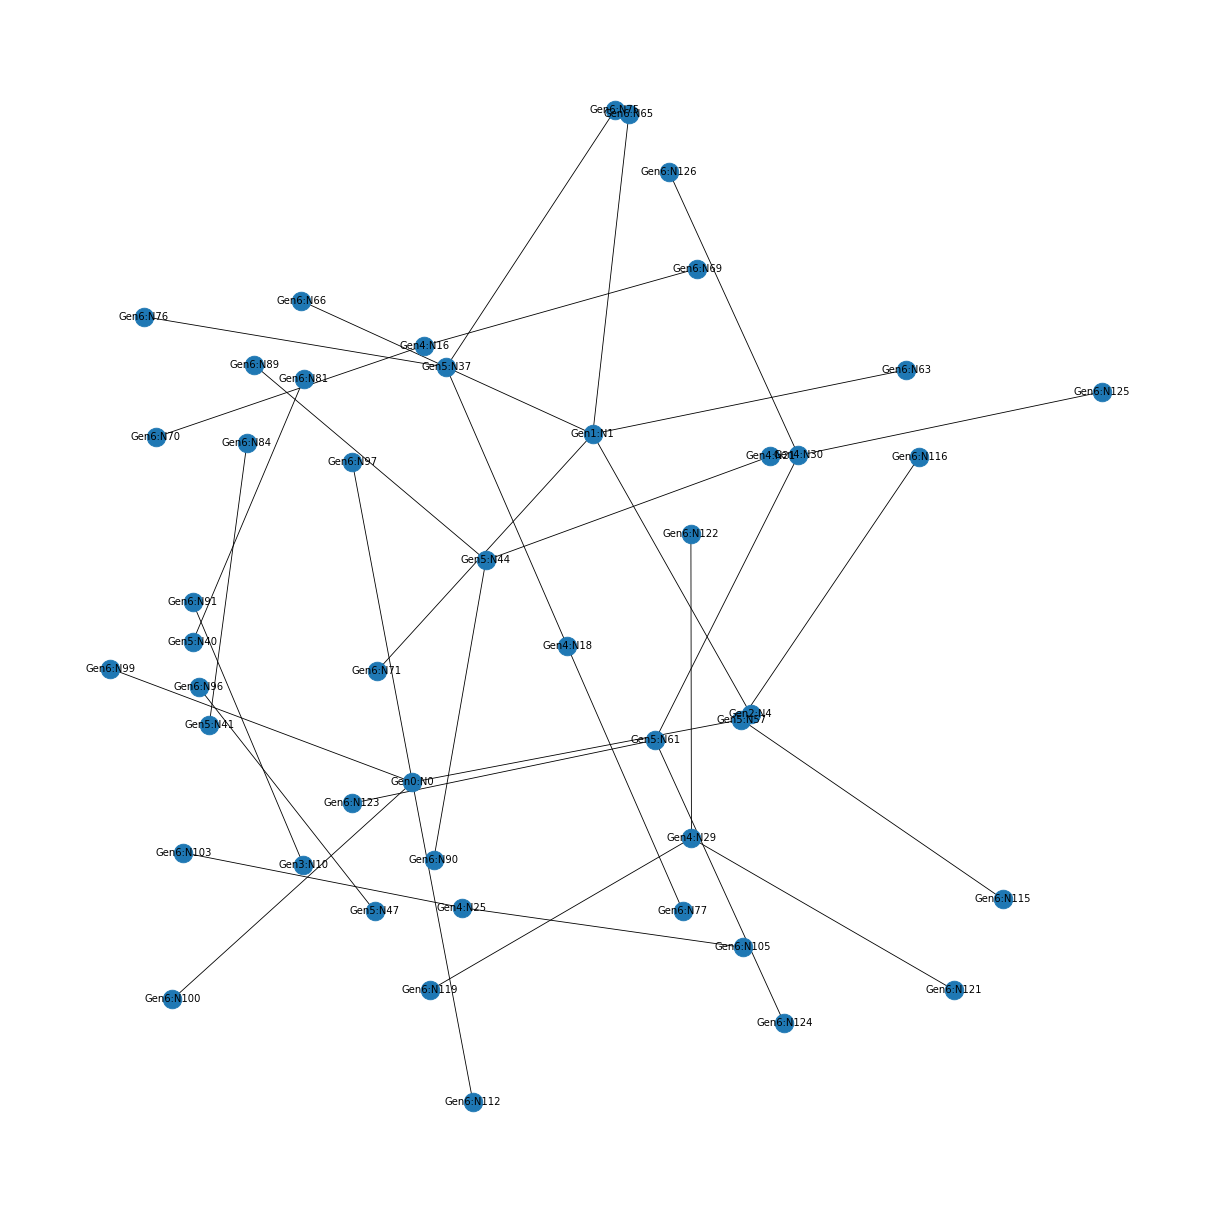

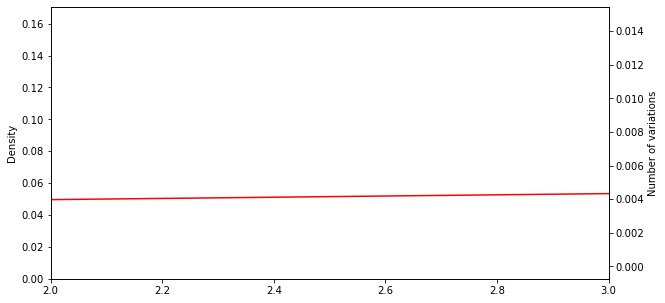

In [4]:
new_dataset = {}
# define childs
# select seq from last generation to mutate
# simulated_dataset = predicted_dataset
 
# for end-node make childs


predicted_dataset = simulated_dataset

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])

Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences



vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())




(0.0, 100.0)

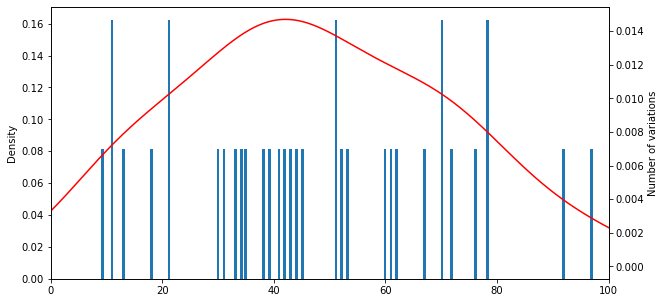

In [5]:
vars_test = vars_all

fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
# vars.pos.plot.hist(bins=100, linewidth=1, ax = ax, density = True, normed=True)
vars_test.pos.plot(kind ='hist', bins=250, width=0.5, ax = ax, density = True)
vars_test.pos.plot.kde(c = 'r', ax = ax, secondary_y=True)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")
ax.set_xlim(0,100)


### NW Align

Gen0:N0:  []
Gen1:N1:  []
Gen1:N2:  []
Gen2:N3:  []
Gen2:N4:  ['Gen1:N1']
Gen2:N5:  []
Gen2:N6:  []
Gen3:N7:  []
Gen3:N8:  []
Gen3:N9:  []
Gen3:N10:  []
Gen3:N11:  []
Gen3:N12:  []
Gen3:N13:  []
Gen3:N14:  []
Gen4:N15:  []
Gen4:N16:  ['Gen1:N1']
Gen4:N17:  []
Gen4:N18:  ['Gen1:N1']
Gen4:N19:  []
Gen4:N20:  ['Gen3:N9']
Gen4:N21:  ['Gen3:N10']
Gen4:N22:  []
Gen4:N23:  []
Gen4:N24:  []
Gen4:N25:  ['Gen0:N0']
Gen4:N26:  []
Gen4:N27:  []
Gen4:N28:  []
Gen4:N29:  ['Gen1:N1']
Gen4:N30:  ['Gen1:N1']


/tmp/ipykernel_1109371/1577463388.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1109371/1577463388.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1109371/1577463388.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1109371/1577463388.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1109371/1577463388.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

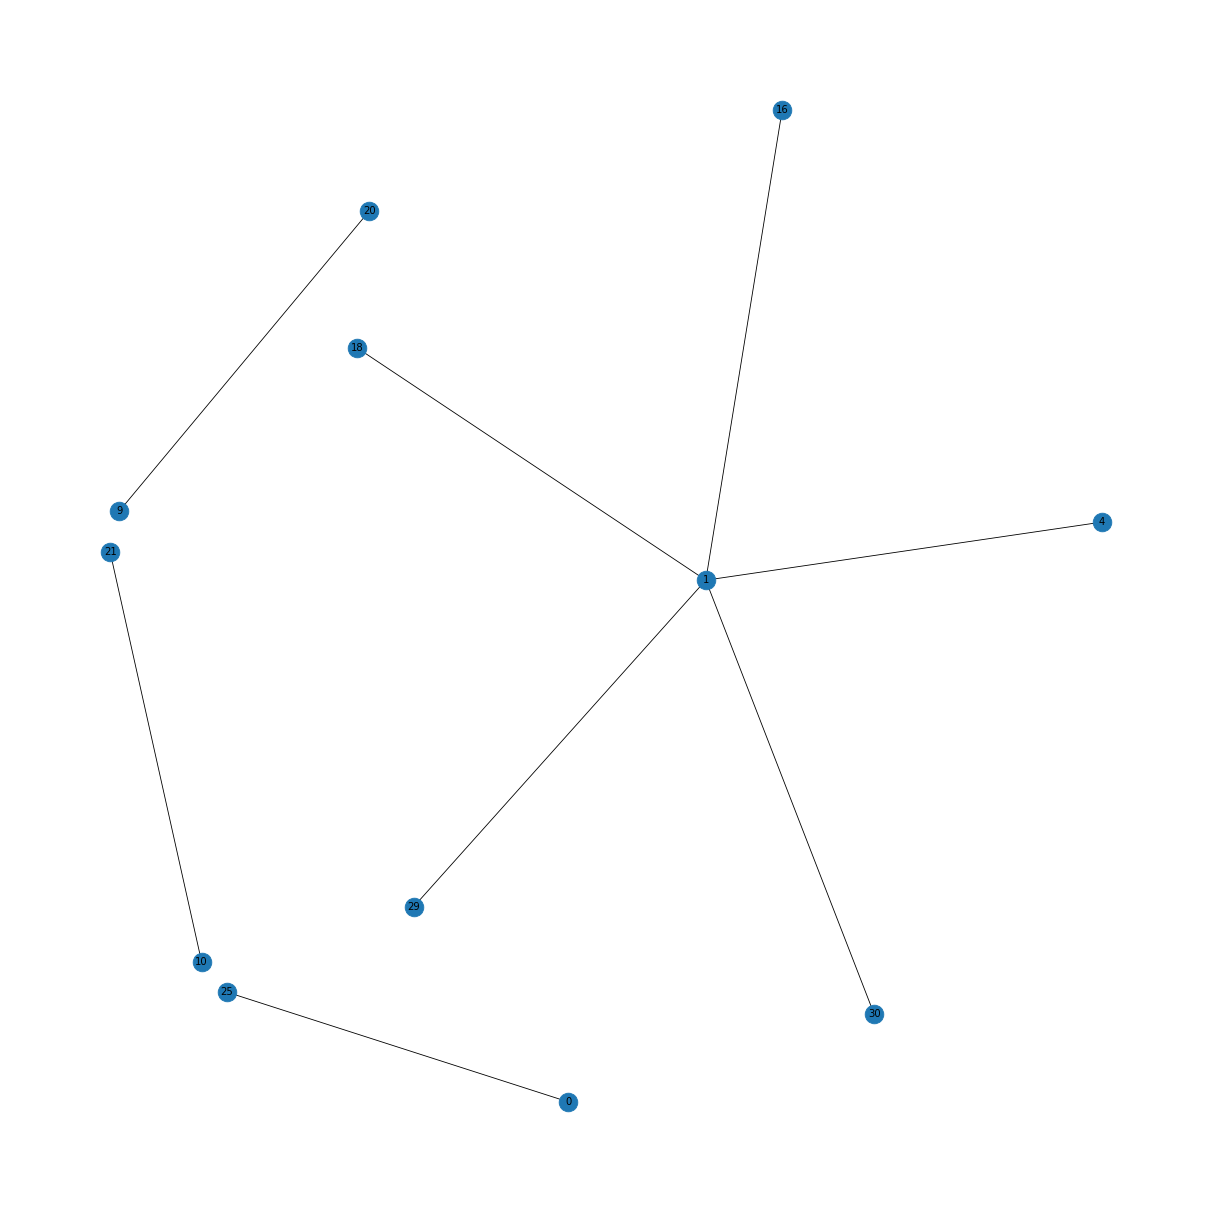

In [6]:

original_dataset = simulated_dataset
train_dataset = {}
test_dataset = {}
N_gen = 5
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G < N_gen:
        train_dataset[id] = simulated_dataset[id]
    else:
        test_dataset[id] = simulated_dataset[id]


# 1. pairwise align
path = './data/tmp/'

simulated_dataset = train_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])




names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])


import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        print(i + ": ", list(Y.columns))
        for c in list(Y.columns):
            edges.append([i, c])


Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id).split('N')[1]
    i+=1
id_map
edgelist = Edges.replace({0 : id_map, 1 : id_map} )
edgelist.columns = ['source','target']



fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


from sklearn import linear_model

# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()


vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')



mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

vars = vars_all
vars_G1 = vars_all


(0.0, 100.0)

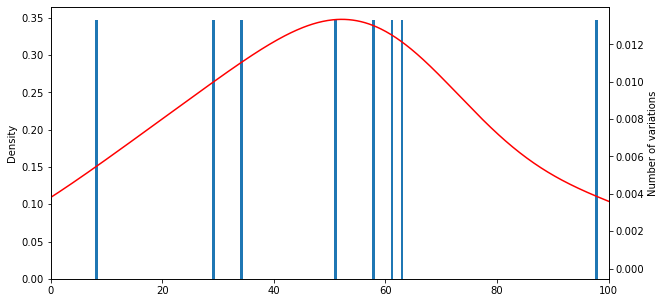

In [7]:

vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
# vars.pos.plot.hist(bins=100, linewidth=1, ax = ax, density = True, normed=True)
vars_all.pos.plot(kind ='hist', bins=250, width=0.5, ax = ax, density = True)
vars_all.pos.plot.kde(c = 'r', ax = ax, secondary_y=True)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")
ax.set_xlim(0,100)


In [ ]:
from Bio import pairwise2
from Bio import Align
import scipy
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

mut_rate = pd.concat( [mut_rate ,  pd.DataFrame({'x' : [0] , 'y' : [0]})] )

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
r = mut_rate_all.x  / mut_rate_all.y
N = round( r.mean() ) # N = number of mut per generation

new_dataset = {}
# define childs
# select seq from last generation to mutate
last_gen = 4
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G >= last_gen:
        last_gen_dataset[id] = simulated_dataset[id]

Var = vars_all
di = dict({'A':0,'C':1,'G':2,'T':3, '-':4})
Var.ref = Var['ref'].map(di)
Var.tar = Var['tar'].map(di)
Var.pos = Var['pos']
X = Var[['ref','pos']]
y = Var[['tar']]


randomforest = RandomForestClassifier()
randomforest.fit(X, y)



def reverse_map(lst):
    new_list = []
    while len(lst):
        e = lst.pop()
        e = str(e).replace('0','A').replace('1','C').replace('2','G').replace('3','T')
        new_list.append(e)
    return new_list

mu, std = scipy.stats.norm.fit(np.array(vars_all['pos'], dtype=int) )

/tmp/ipykernel_1413708/64793630.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X, y)


# Precit G +1

Gen4:N15
Gen4:N16
Gen4:N17
Gen4:N18
Gen4:N19
Gen4:N20
Gen4:N21
Gen4:N22
Gen4:N23
Gen4:N24
Gen4:N25
Gen4:N26
Gen4:N27
Gen4:N28
Gen4:N29
Gen4:N30
Gen0:N0:  Gen1:N1
Gen2:N4:  Gen0:N0
Gen2:N5:  Gen1:N2
Gen2:N6:  Gen1:N2
Gen3:N8:  Gen1:N2
Gen3:N10:  Gen2:N4
Gen3:N11:  Gen2:N5
Gen3:N12:  Gen2:N5
Gen3:N14:  Gen2:N6
Gen4:N15:  Gen3:N7
Gen4:N16:  Gen3:N7
Gen4:N17:  Gen3:N8
Gen4:N18:  Gen3:N8
Gen4:N19:  Gen1:N1
Gen4:N20:  Gen1:N1
Gen4:N21:  Gen3:N10
Gen4:N22:  Gen3:N10
Gen4:N25:  Gen3:N12
Gen4:N26:  Gen3:N12
Gen4:N27:  Gen3:N7
Gen4:N28:  Gen3:N7
Gen4:N29:  Gen3:N14
Gen4:N30:  Gen3:N14
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N1:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15
Gen5:N2:  Gen4:N15


/tmp/ipykernel_1413708/1808333702.py:172: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/1808333702.py:172: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/1808333702.py:172: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/1808333702.py:172: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/1808333702.py:172: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

0.9043859649122808


(0.0, 100.0)

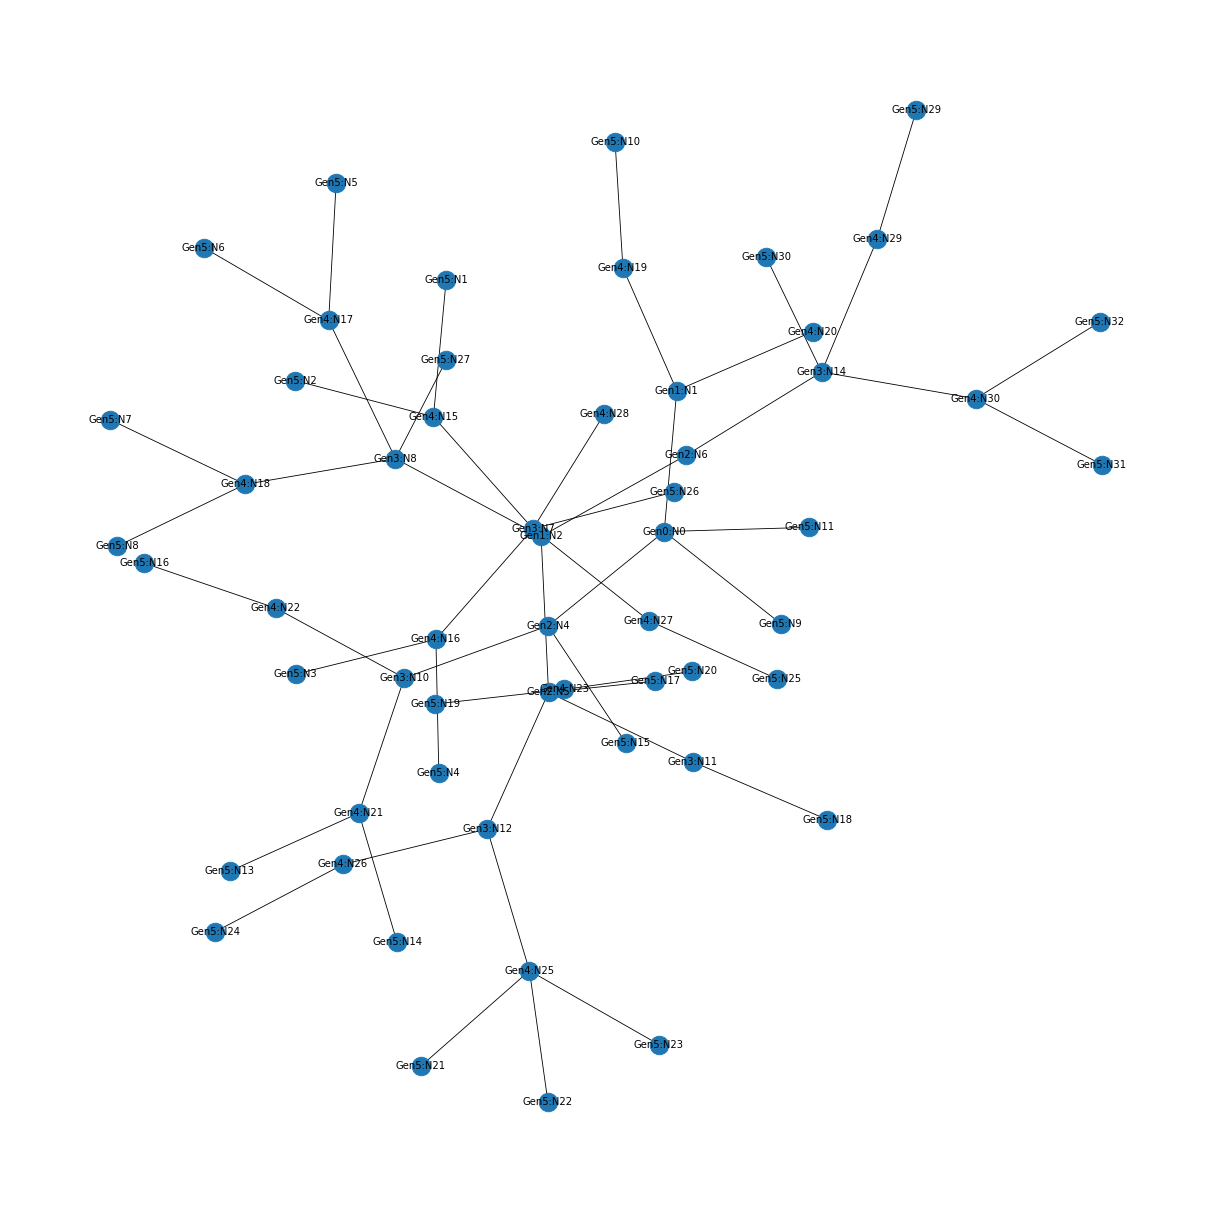

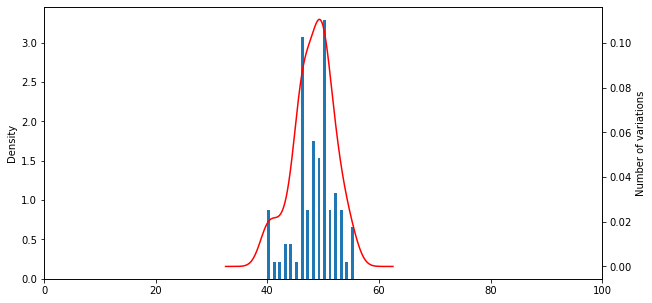

In [ ]:
new_dataset = {}
# define childs
# select seq from last generation to mutate
# simulated_dataset = predicted_dataset
simulated_dataset = train_dataset

last_gen = 4
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G == last_gen:
        last_gen_dataset[id] = simulated_dataset[id]

# for end-node make childs
c = 0

G = last_gen
parents = last_gen_dataset
G += 1
for id in last_gen_dataset:
    print(id)
    seq = parents[id] 
    #right 
    c+=1
    N = round( r.mean() ) # N = number of mut per generation
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
    #left 
    seq = parents[id] 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq

predicted_dataset = train_dataset | new_dataset

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])

Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences



vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())

vars_G2 = vars_all

vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
# vars.pos.plot.hist(bins=100, linewidth=1, ax = ax, density = True, normed=True)
vars_all.pos.plot(kind ='hist', bins=250, width=0.5, ax = ax, density = True)
vars_all.pos.plot.kde(c = 'r', ax = ax, secondary_y=True)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")
ax.set_xlim(0,100)



# G +2

Gen5:N1
Gen5:N2
Gen5:N3
Gen5:N4
Gen5:N5
Gen5:N6
Gen5:N7
Gen5:N8
Gen5:N9
Gen5:N10
Gen5:N11
Gen5:N12
Gen5:N13
Gen5:N14
Gen5:N15
Gen5:N16
Gen5:N17
Gen5:N18
Gen5:N19
Gen5:N20
Gen5:N21
Gen5:N22
Gen5:N23
Gen5:N24
Gen5:N25
Gen5:N26
Gen5:N27
Gen5:N28
Gen5:N29
Gen5:N30
Gen5:N31
Gen5:N32
Gen0:N0:  Gen1:N1
Gen2:N4:  Gen0:N0
Gen2:N5:  Gen1:N2
Gen2:N6:  Gen1:N2
Gen3:N8:  Gen1:N2
Gen3:N11:  Gen2:N5
Gen3:N12:  Gen2:N5
Gen3:N14:  Gen2:N6
Gen4:N16:  Gen3:N7
Gen4:N17:  Gen3:N8
Gen4:N18:  Gen3:N8
Gen4:N19:  Gen1:N1
Gen4:N20:  Gen1:N1
Gen4:N21:  Gen3:N10
Gen4:N22:  Gen3:N10
Gen4:N25:  Gen3:N12
Gen4:N26:  Gen3:N12
Gen4:N27:  Gen3:N7
Gen4:N28:  Gen3:N7
Gen4:N29:  Gen3:N14
Gen4:N30:  Gen3:N14
Gen6:N1:  Gen4:N15
Gen6:N1:  Gen4:N15
Gen6:N1:  Gen4:N15
Gen6:N1:  Gen4:N15
Gen6:N1:  Gen4:N15
Gen6:N1:  Gen4:N15
Gen6:N1:  Gen4:N15
Gen6:N1:  Gen4:N15
Gen6:N1:  Gen4:N15
Gen6:N1:  Gen4:N15
Gen6:N1:  Gen4:N15
Gen6:N2:  Gen4:N15
Gen6:N2:  Gen4:N15
Gen6:N2:  Gen4:N15
Gen6:N2:  Gen4:N15
Gen6:N2:  Gen4:N15
Gen6:N2:  Gen4:N1

/tmp/ipykernel_1413708/4289826748.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/4289826748.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/4289826748.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/4289826748.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/4289826748.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

0.9787760416666673


(0.0, 100.0)

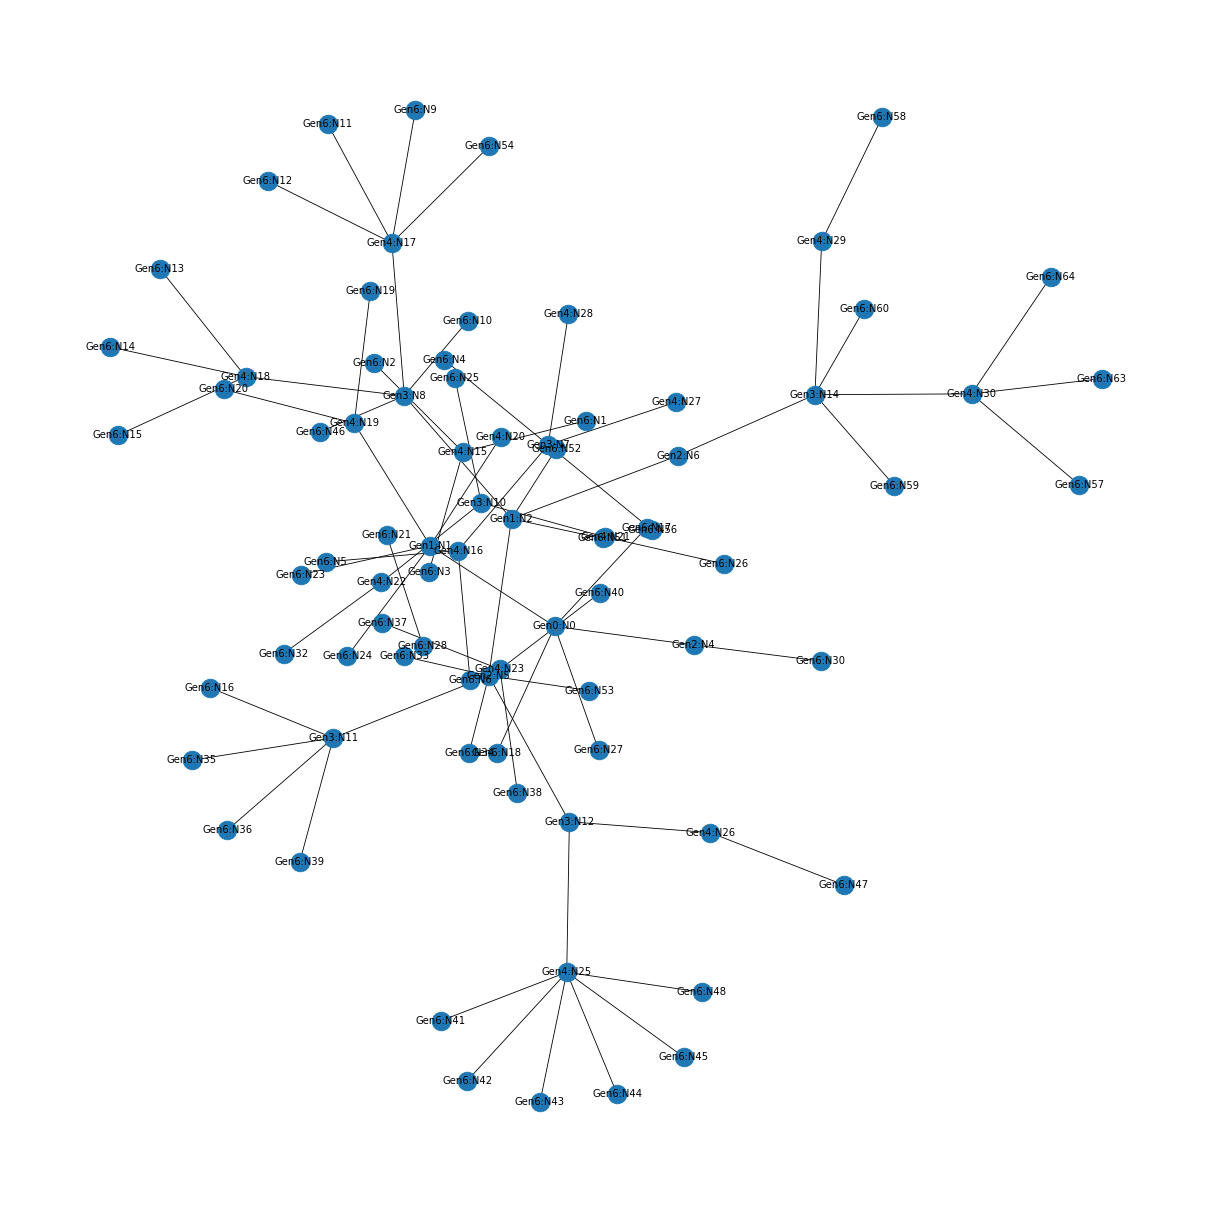

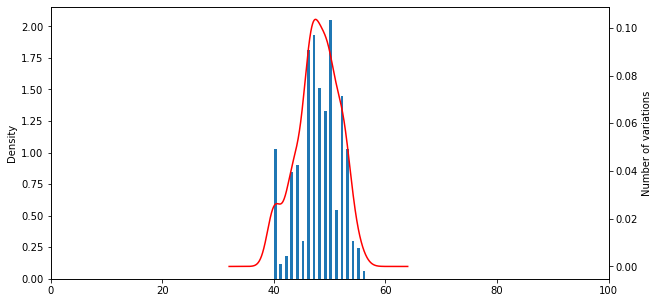

In [ ]:
new_dataset = {}
# define childs
# select seq from last generation to mutate
simulated_dataset = predicted_dataset

last_gen = 5
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G == last_gen:
        last_gen_dataset[id] = simulated_dataset[id]

# for end-node make childs
c = 0

G = last_gen
parents = last_gen_dataset
G += 1
for id in last_gen_dataset:
    print(id)
    seq = parents[id] 
    #right 
    c+=1
    N = round( r.mean() ) # N = number of mut per generation
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
    #left 
    seq = parents[id] 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq

predicted_dataset = train_dataset | new_dataset

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])

Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences



vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())


vars_G3 = vars_all

vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
# vars.pos.plot.hist(bins=100, linewidth=1, ax = ax, density = True, normed=True)
vars_all.pos.plot(kind ='hist', bins=250, width=0.5, ax = ax, density = True)
vars_all.pos.plot.kde(c = 'r', ax = ax, secondary_y=True)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")
ax.set_xlim(0,100)

# GEN ++3

Gen6:N1
Gen6:N2
Gen6:N3
Gen6:N4
Gen6:N5
Gen6:N6
Gen6:N7
Gen6:N8
Gen6:N9
Gen6:N10
Gen6:N11
Gen6:N12
Gen6:N13
Gen6:N14
Gen6:N15
Gen6:N16
Gen6:N17
Gen6:N18
Gen6:N19
Gen6:N20
Gen6:N21
Gen6:N22
Gen6:N23
Gen6:N24
Gen6:N25
Gen6:N26
Gen6:N27
Gen6:N28
Gen6:N29
Gen6:N30
Gen6:N31
Gen6:N32
Gen6:N33
Gen6:N34
Gen6:N35
Gen6:N36
Gen6:N37
Gen6:N38
Gen6:N39
Gen6:N40
Gen6:N41
Gen6:N42
Gen6:N43
Gen6:N44
Gen6:N45
Gen6:N46
Gen6:N47
Gen6:N48
Gen6:N49
Gen6:N50
Gen6:N51
Gen6:N52
Gen6:N53
Gen6:N54
Gen6:N55
Gen6:N56
Gen6:N57
Gen6:N58
Gen6:N59
Gen6:N60
Gen6:N61
Gen6:N62
Gen6:N63
Gen6:N64
Gen0:N0:  Gen1:N1
Gen2:N4:  Gen0:N0
Gen2:N5:  Gen1:N2
Gen2:N6:  Gen1:N2
Gen3:N8:  Gen1:N2
Gen3:N10:  Gen2:N4
Gen3:N11:  Gen2:N5
Gen3:N12:  Gen2:N5
Gen3:N14:  Gen2:N6
Gen4:N15:  Gen3:N7
Gen4:N16:  Gen3:N7
Gen4:N17:  Gen3:N8
Gen4:N18:  Gen3:N8
Gen4:N19:  Gen1:N1
Gen4:N20:  Gen1:N1
Gen4:N21:  Gen3:N10
Gen4:N25:  Gen3:N12
Gen4:N26:  Gen3:N12
Gen4:N27:  Gen3:N7
Gen4:N28:  Gen3:N7
Gen4:N29:  Gen3:N14
Gen4:N30:  Gen3:N14
Gen7:N1:  Gen4:

/tmp/ipykernel_1413708/1001473458.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/1001473458.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/1001473458.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/1001473458.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/1001473458.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

0.7700705467372134


(0.0, 100.0)

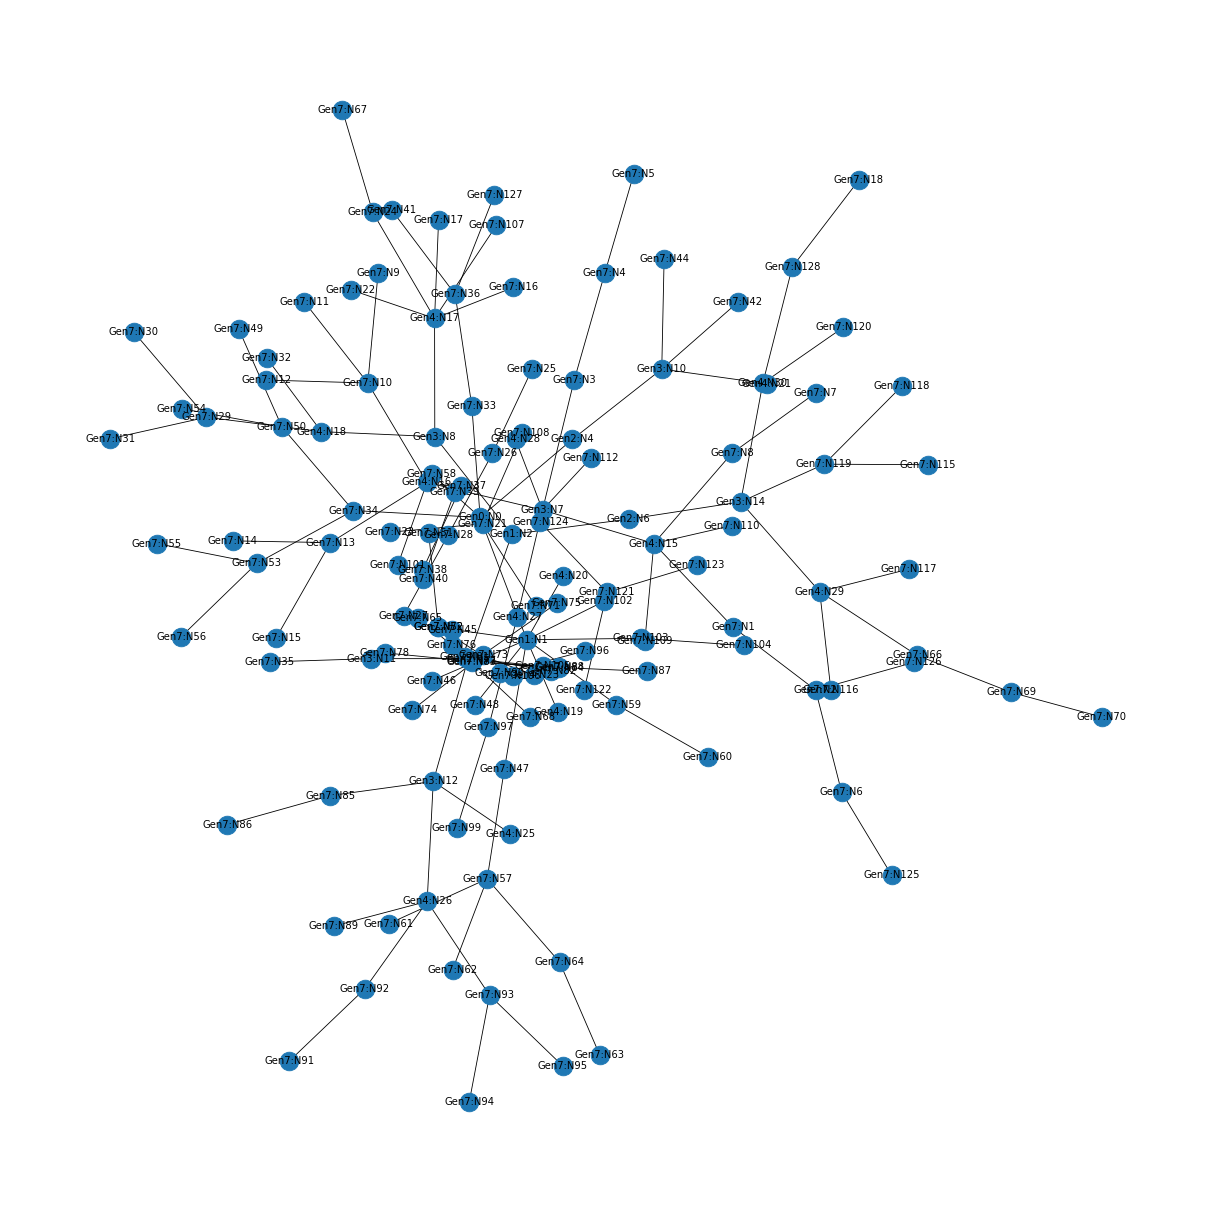

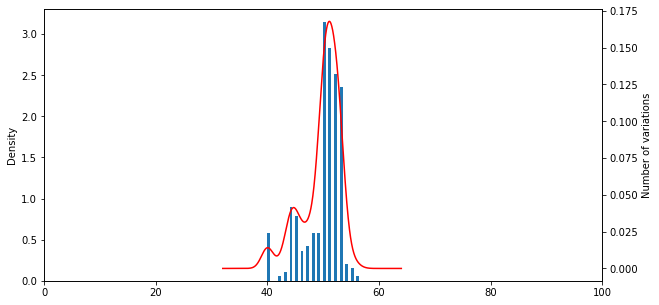

In [ ]:
new_dataset = {}
# define childs
# select seq from last generation to mutate
simulated_dataset = predicted_dataset

last_gen = 6
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G == last_gen:
        last_gen_dataset[id] = simulated_dataset[id]

# for end-node make childs
c = 0

G = last_gen
parents = last_gen_dataset
G += 1
for id in last_gen_dataset:
    print(id)
    seq = parents[id] 
    #right 
    c+=1
    N = round( r.mean() ) # N = number of mut per generation
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
    #left 
    seq = parents[id] 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq

predicted_dataset = train_dataset | new_dataset

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])

Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences



vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())


vars_G4 = vars_all

vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
# vars.pos.plot.hist(bins=100, linewidth=1, ax = ax, density = True, normed=True)
vars_all.pos.plot(kind ='hist', bins=250, width=0.5, ax = ax, density = True)
vars_all.pos.plot.kde(c = 'r', ax = ax, secondary_y=True)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")
ax.set_xlim(0,100)

# G +3

Gen7:N1
Gen7:N2
Gen7:N3
Gen7:N4
Gen7:N5
Gen7:N6
Gen7:N7
Gen7:N8
Gen7:N9
Gen7:N10
Gen7:N11
Gen7:N12
Gen7:N13
Gen7:N14
Gen7:N15
Gen7:N16
Gen7:N17
Gen7:N18
Gen7:N19
Gen7:N20
Gen7:N21
Gen7:N22
Gen7:N23
Gen7:N24
Gen7:N25
Gen7:N26
Gen7:N27
Gen7:N28
Gen7:N29
Gen7:N30
Gen7:N31
Gen7:N32
Gen7:N33
Gen7:N34
Gen7:N35
Gen7:N36
Gen7:N37
Gen7:N38
Gen7:N39
Gen7:N40
Gen7:N41
Gen7:N42
Gen7:N43
Gen7:N44
Gen7:N45
Gen7:N46
Gen7:N47
Gen7:N48
Gen7:N49
Gen7:N50
Gen7:N51
Gen7:N52
Gen7:N53
Gen7:N54
Gen7:N55
Gen7:N56
Gen7:N57
Gen7:N58
Gen7:N59
Gen7:N60
Gen7:N61
Gen7:N62
Gen7:N63
Gen7:N64
Gen7:N65
Gen7:N66
Gen7:N67
Gen7:N68
Gen7:N69
Gen7:N70
Gen7:N71
Gen7:N72
Gen7:N73
Gen7:N74
Gen7:N75
Gen7:N76
Gen7:N77
Gen7:N78
Gen7:N79
Gen7:N80
Gen7:N81
Gen7:N82
Gen7:N83
Gen7:N84
Gen7:N85
Gen7:N86
Gen7:N87
Gen7:N88
Gen7:N89
Gen7:N90
Gen7:N91
Gen7:N92
Gen7:N93
Gen7:N94
Gen7:N95
Gen7:N96
Gen7:N97
Gen7:N98
Gen7:N99
Gen7:N100
Gen7:N101
Gen7:N102
Gen7:N103
Gen7:N104
Gen7:N105
Gen7:N106
Gen7:N107
Gen7:N108
Gen7:N109
Gen7:N110
Gen7:N11

/tmp/ipykernel_1413708/2650552459.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/2650552459.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/2650552459.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/2650552459.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/2650552459.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

0.6710630743525484


(0.0, 100.0)

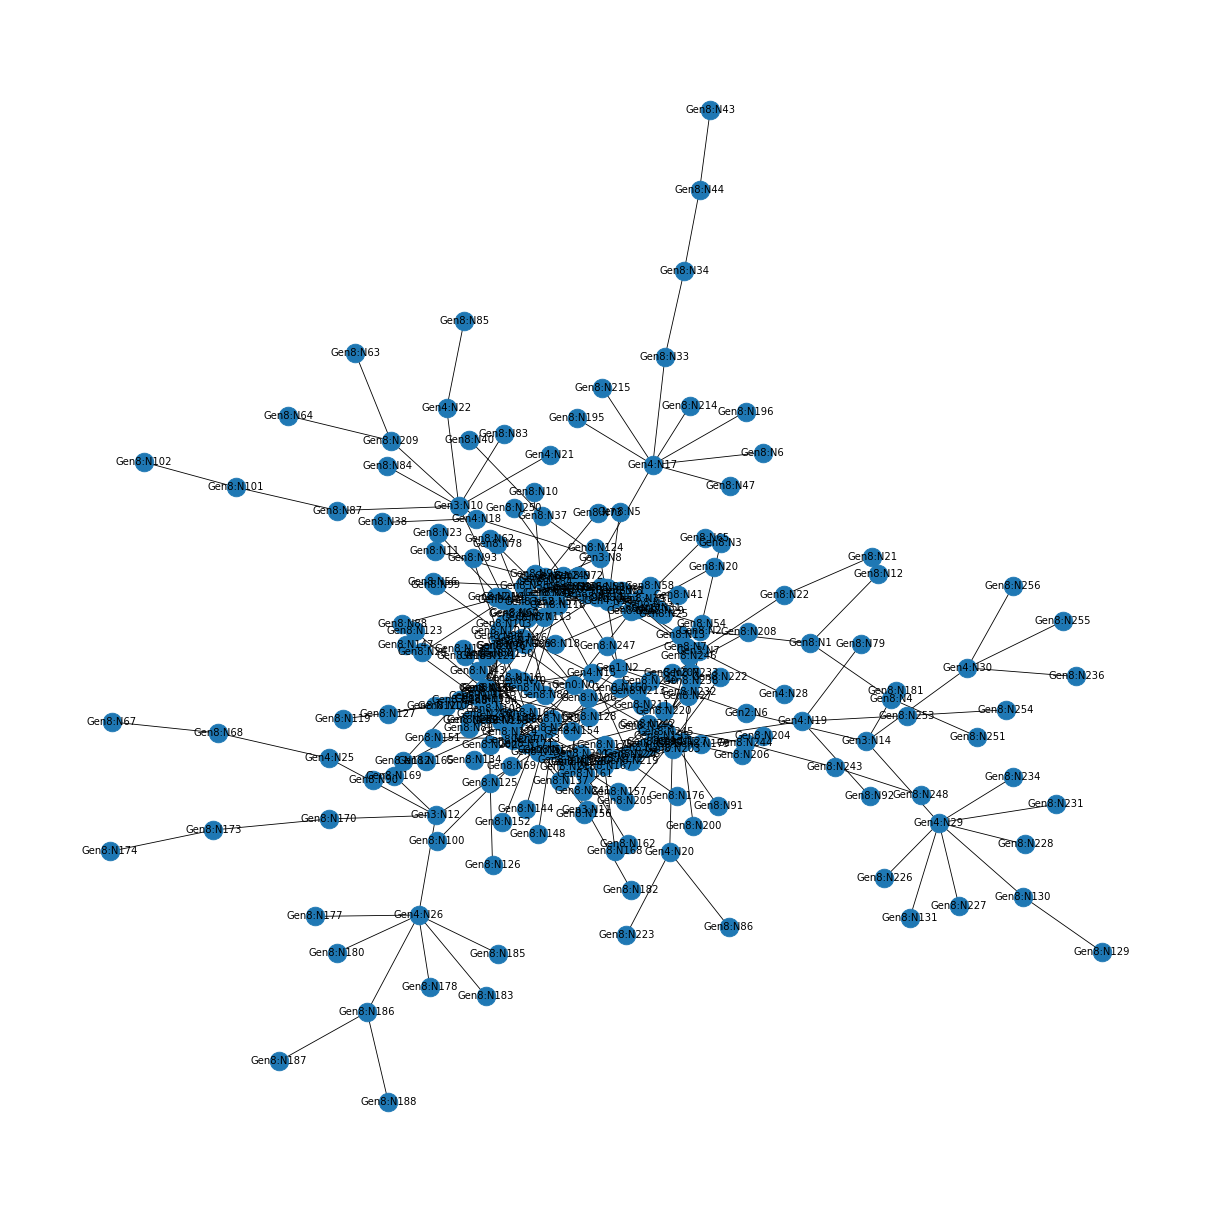

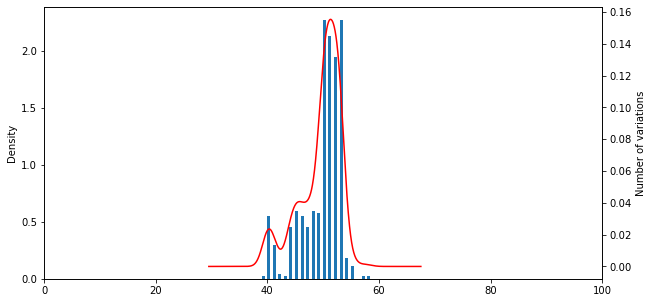

In [ ]:
new_dataset = {}
# define childs
# select seq from last generation to mutate
simulated_dataset = predicted_dataset

last_gen = 7
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G == last_gen:
        last_gen_dataset[id] = simulated_dataset[id]

# for end-node make childs
c = 0

G = last_gen
parents = last_gen_dataset
G += 1
for id in last_gen_dataset:
    print(id)
    seq = parents[id] 
    #right 
    c+=1
    N = round( r.mean() ) # N = number of mut per generation
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
    #left 
    seq = parents[id] 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq

predicted_dataset = train_dataset | new_dataset

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])

Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences



vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())


vars_G5 = vars_all



vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
# vars.pos.plot.hist(bins=100, linewidth=1, ax = ax, density = True, normed=True)
vars_all.pos.plot(kind ='hist', bins=250, width=0.5, ax = ax, density = True)
vars_all.pos.plot.kde(c = 'r', ax = ax, secondary_y=True)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")
ax.set_xlim(0,100)

# G +4

Gen8:N1
Gen8:N2
Gen8:N3
Gen8:N4
Gen8:N5
Gen8:N6
Gen8:N7
Gen8:N8
Gen8:N9
Gen8:N10
Gen8:N11
Gen8:N12
Gen8:N13
Gen8:N14
Gen8:N15
Gen8:N16
Gen8:N17
Gen8:N18
Gen8:N19
Gen8:N20
Gen8:N21
Gen8:N22
Gen8:N23
Gen8:N24
Gen8:N25
Gen8:N26
Gen8:N27
Gen8:N28
Gen8:N29
Gen8:N30
Gen8:N31
Gen8:N32
Gen8:N33
Gen8:N34
Gen8:N35
Gen8:N36
Gen8:N37
Gen8:N38
Gen8:N39
Gen8:N40
Gen8:N41
Gen8:N42
Gen8:N43
Gen8:N44
Gen8:N45
Gen8:N46
Gen8:N47
Gen8:N48
Gen8:N49
Gen8:N50
Gen8:N51
Gen8:N52
Gen8:N53
Gen8:N54
Gen8:N55
Gen8:N56
Gen8:N57
Gen8:N58
Gen8:N59
Gen8:N60
Gen8:N61
Gen8:N62
Gen8:N63
Gen8:N64
Gen8:N65
Gen8:N66
Gen8:N67
Gen8:N68
Gen8:N69
Gen8:N70
Gen8:N71
Gen8:N72
Gen8:N73
Gen8:N74
Gen8:N75
Gen8:N76
Gen8:N77
Gen8:N78
Gen8:N79
Gen8:N80
Gen8:N81
Gen8:N82
Gen8:N83
Gen8:N84
Gen8:N85
Gen8:N86
Gen8:N87
Gen8:N88
Gen8:N89
Gen8:N90
Gen8:N91
Gen8:N92
Gen8:N93
Gen8:N94
Gen8:N95
Gen8:N96
Gen8:N97
Gen8:N98
Gen8:N99
Gen8:N100
Gen8:N101
Gen8:N102
Gen8:N103
Gen8:N104
Gen8:N105
Gen8:N106
Gen8:N107
Gen8:N108
Gen8:N109
Gen8:N110
Gen8:N11

/tmp/ipykernel_1413708/3377630854.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/3377630854.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/3377630854.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/3377630854.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/3377630854.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

0.4457888615216201


(0.0, 100.0)

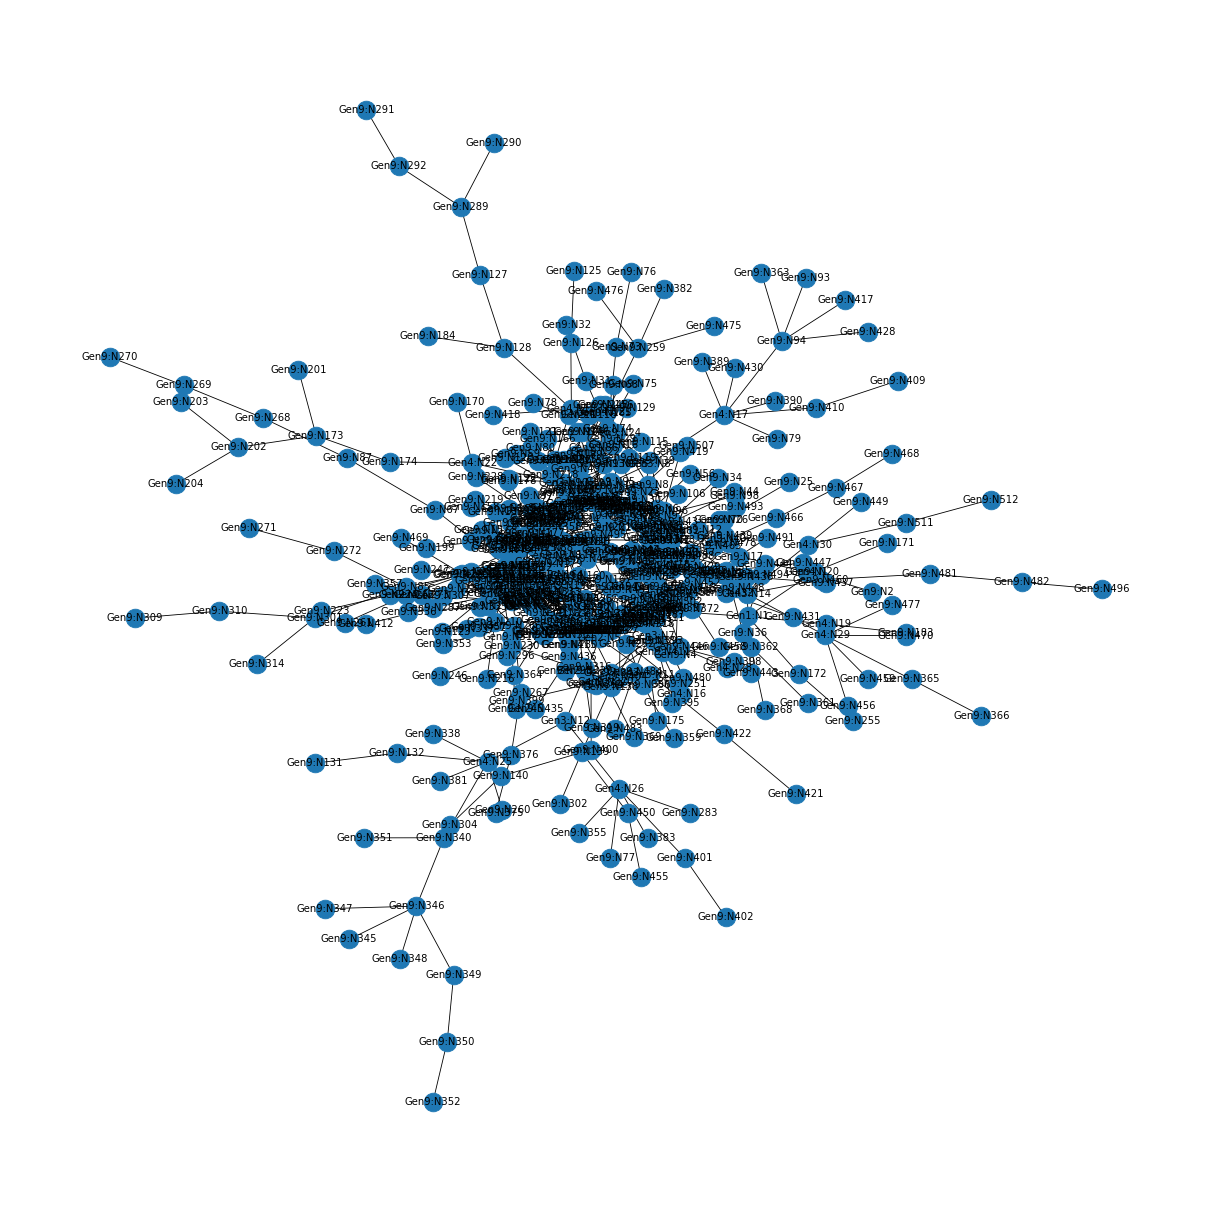

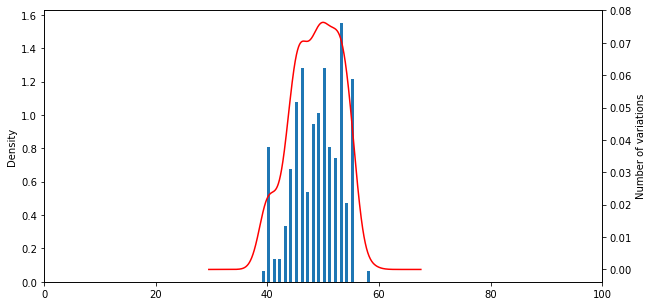

In [ ]:
new_dataset = {}
# define childs
# select seq from last generation to mutate
simulated_dataset = predicted_dataset

last_gen = 8
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G == last_gen:
        last_gen_dataset[id] = simulated_dataset[id]

# for end-node make childs
c = 0

G = last_gen
parents = last_gen_dataset
G += 1
for id in last_gen_dataset:
    print(id)
    seq = parents[id] 
    #right 
    c+=1
    N = round( r.mean() ) # N = number of mut per generation
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
    #left 
    seq = parents[id] 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq

predicted_dataset = train_dataset | new_dataset

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])

Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences



vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())



vars_all
vars_G6 = vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
# vars.pos.plot.hist(bins=100, linewidth=1, ax = ax, density = True, normed=True)
vars_all.pos.plot(kind ='hist', bins=250, width=0.5, ax = ax, density = True)
vars_all.pos.plot.kde(c = 'r', ax = ax, secondary_y=True)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")
ax.set_xlim(0,100)

# G +5

Gen9:N1
Gen9:N2
Gen9:N3
Gen9:N4
Gen9:N5
Gen9:N6
Gen9:N7
Gen9:N8
Gen9:N9
Gen9:N10
Gen9:N11
Gen9:N12
Gen9:N13
Gen9:N14
Gen9:N15
Gen9:N16
Gen9:N17
Gen9:N18
Gen9:N19
Gen9:N20
Gen9:N21
Gen9:N22
Gen9:N23
Gen9:N24
Gen9:N25
Gen9:N26
Gen9:N27
Gen9:N28
Gen9:N29
Gen9:N30
Gen9:N31
Gen9:N32
Gen9:N33
Gen9:N34
Gen9:N35
Gen9:N36
Gen9:N37
Gen9:N38
Gen9:N39
Gen9:N40
Gen9:N41
Gen9:N42
Gen9:N43
Gen9:N44
Gen9:N45
Gen9:N46
Gen9:N47
Gen9:N48
Gen9:N49
Gen9:N50
Gen9:N51
Gen9:N52
Gen9:N53
Gen9:N54
Gen9:N55
Gen9:N56
Gen9:N57
Gen9:N58
Gen9:N59
Gen9:N60
Gen9:N61
Gen9:N62
Gen9:N63
Gen9:N64
Gen9:N65
Gen9:N66
Gen9:N67
Gen9:N68
Gen9:N69
Gen9:N70
Gen9:N71
Gen9:N72
Gen9:N73
Gen9:N74
Gen9:N75
Gen9:N76
Gen9:N77
Gen9:N78
Gen9:N79
Gen9:N80
Gen9:N81
Gen9:N82
Gen9:N83
Gen9:N84
Gen9:N85
Gen9:N86
Gen9:N87
Gen9:N88
Gen9:N89
Gen9:N90
Gen9:N91
Gen9:N92
Gen9:N93
Gen9:N94
Gen9:N95
Gen9:N96
Gen9:N97
Gen9:N98
Gen9:N99
Gen9:N100
Gen9:N101
Gen9:N102
Gen9:N103
Gen9:N104
Gen9:N105
Gen9:N106
Gen9:N107
Gen9:N108
Gen9:N109
Gen9:N110
Gen9:N11

/tmp/ipykernel_1413708/2572107960.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/2572107960.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/2572107960.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/2572107960.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vars_all = vars_all.append(vars)
/tmp/ipykernel_1413708/2572107960.py:171: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

0.5411364684186257


(0.0, 100.0)

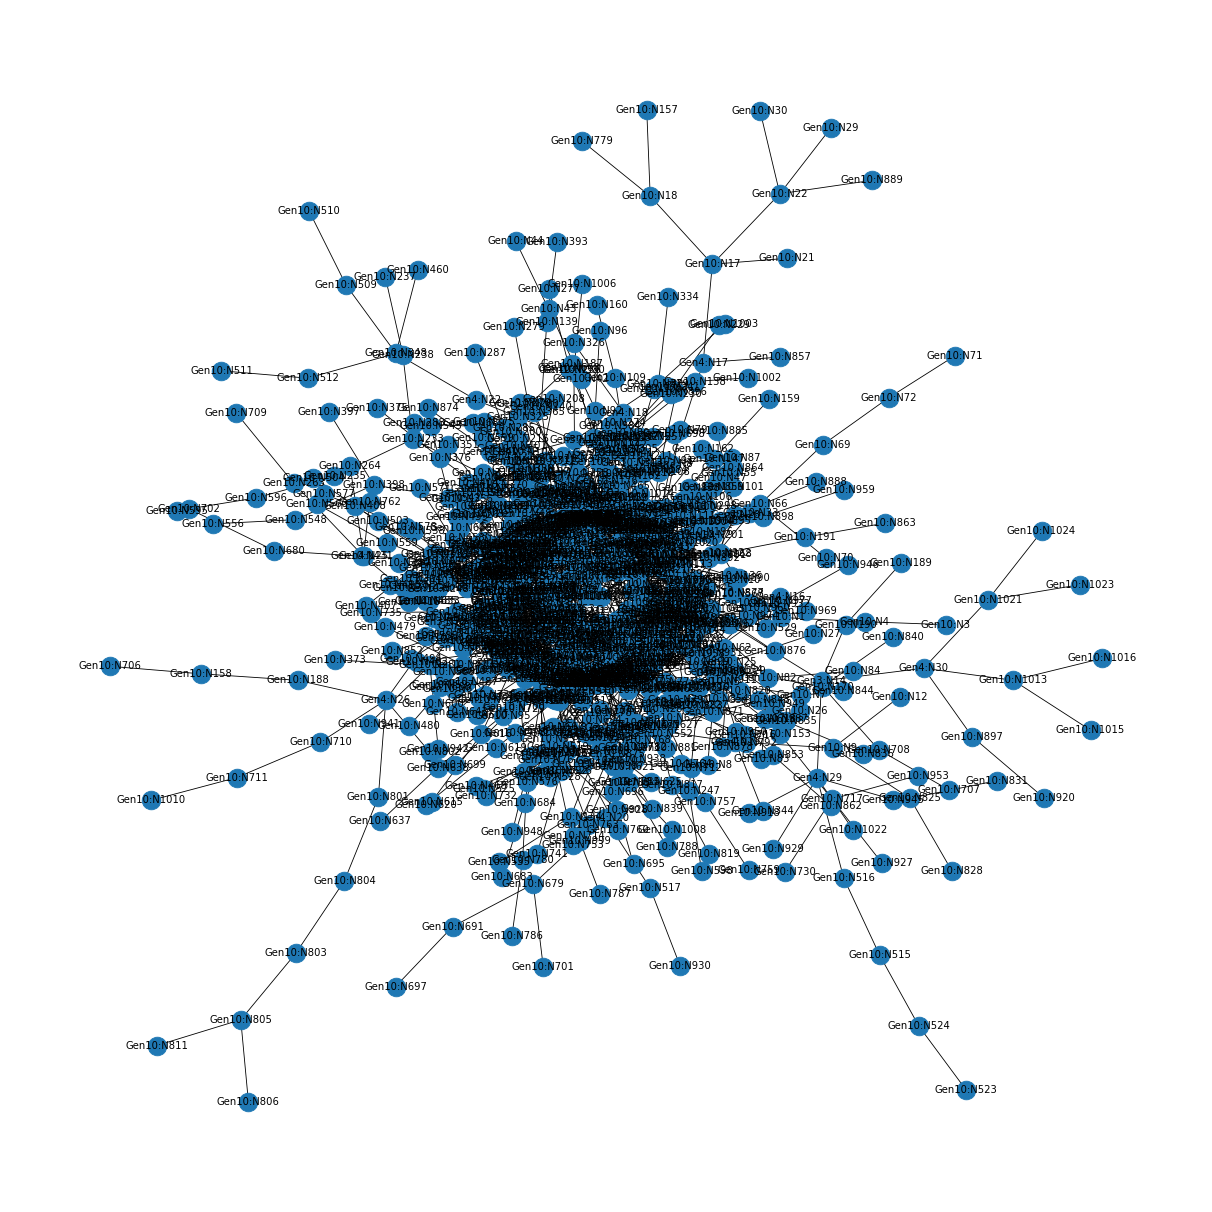

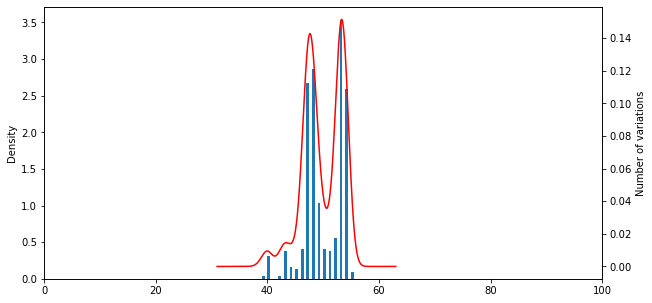

In [ ]:
new_dataset = {}
# define childs
# select seq from last generation to mutate
simulated_dataset = predicted_dataset

last_gen = 9
last_gen_dataset = {}
for id in simulated_dataset:
    G = int(id.split(':')[0].replace('Gen',''))
    if G == last_gen:
        last_gen_dataset[id] = simulated_dataset[id]

# for end-node make childs
c = 0

G = last_gen
parents = last_gen_dataset
G += 1
for id in last_gen_dataset:
    print(id)
    seq = parents[id] 
    #right 
    c+=1
    N = round( r.mean() ) # N = number of mut per generation
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq
    #left 
    seq = parents[id] 
    c+=1
    pos = get_truncated_normal(mu, std, low=1, upp=L).rvs(N)
    refs = []
    for p in pos :
        refs.append(seq[int(p)])
    X_test = pd.DataFrame( { 'ref' : refs, 'pos' : pos } )
    X_test['ref'] = X_test['ref'].map(di)
    y_pred = randomforest.predict(X_test)
    y_Pred = reverse_map(list(y_pred))
    for i in range(len(pos)):
        p = int(pos[i])
        seq = seq[:p] + y_Pred[i] + seq[p+1:] # insert new mutated base in sequence
    new_dataset['Gen'+str(G)+":N"+str(c)]=seq

predicted_dataset = train_dataset | new_dataset

# 1. pairwise align
path = './data/tmp/'

simulated_dataset = predicted_dataset
ids = list(simulated_dataset)
scores = []
score_matrix = pd.DataFrame(np.zeros((len(ids),len(ids))))
score_matrix.index = ids
score_matrix.columns = ids
while len(ids) > 1:
    id_ref = ids.pop(0)
    ref = simulated_dataset[id_ref]
    for id_tar in ids:
        tar = simulated_dataset[id_tar]
        # print(len(ref), len(tar))
        score = dataset_simulator.needle_align_code(ref, tar)
        # print(id_ref , id_tar , score, len(ref), len(tar))
        scores.append([id_ref, id_tar, score ])  #add to the end

scores_df = pd.DataFrame(scores)  
# print(scores_df)


for s in scores:
    score_matrix.loc[s[0] , s[1]] = 100 - float(s[2])
    score_matrix.loc[s[1] , s[0]] =  100 - float(s[2])
score_matrix

names = set( score_matrix.index )

meta = []
for id in names:
    N = str(id).split('N')[1]
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([Gen,N, seq])
meta = pd.DataFrame(meta, columns=['Gen','N', 'seq'])

import pandas as pd
import numpy as np

edges = []

X = score_matrix
# X = X.T
k = 2
for i in X.index:
    Y = X.nsmallest(k, i)
    Y = Y.T
    Y = Y[Y.index.str.startswith(i)]
    Y = Y.loc[:, Y.any()]

    for j in Y.index:
        targets = list(Y.columns)
        for c in targets:
            if c != i:
               print(i + ": ", c)
               edges.append([i, c])

Edges = pd.DataFrame(edges)
id_map = {}
i = 1
names = set( Edges[1] ) | set( Edges[0] ) 
for id in names:
    id_map[id] = str(id)
    i+=1
id_map
edgelist = Edges
edgelist.columns = ['source','target']

fig = plt.figure(1, figsize=(20, 20), dpi=60)
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist)

fig = plt.figure(1, figsize=(20, 20), dpi=50)
nx.draw_kamada_kawai(G, with_labels=True, node_size=500)


meta = []
for id in names:
    N = str(id).split('N')[1]
    ID = id
    Gen = str(id).split(':')[0].replace('Gen','')
    seq = simulated_dataset[id]
    meta.append([ Gen, ID, seq])
meta = pd.DataFrame(meta, columns=['Gen','id', 'seq'])

meta
# combine edgelist and meta to add date
meta.columns = ['source_gen','source','seq_ref']
conneted_sequences = pd.merge(meta, edgelist)
meta.columns = ['target_gen','target','seq_tar']
conneted_sequences = pd.merge(meta, conneted_sequences)
conneted_sequences['gen_dif'] = abs(conneted_sequences['source_gen'].astype(int) - conneted_sequences['target_gen'].astype(int))
conneted_sequences = conneted_sequences.loc[conneted_sequences.gen_dif != 0,:]
# conneted_sequences
conneted_sequences = conneted_sequences.reset_index()
conneted_sequences



vars_all  = pd.DataFrame()
mut_rate  = []
for pair in conneted_sequences.iterrows() :
    sr = pair[1][3]
    st = pair[1][6]
    alignments = pairwise2.align.globalms(sr, st, 5, -4, -3, -.1)
    alignment = format_alignment(*alignments[0]).split('\n')
    ref_bases = [char for char in alignment[0]] 
    tar_bases = [char for char in alignment[2]] 
    pos = [ i for i in range(len(alignment[2])) ]
    vars = [ref_bases, tar_bases, pos]
    vars = pd.DataFrame(vars).T
    vars.columns = ['ref','tar','pos']
    vars = vars.loc[vars.ref != vars.tar ,:]
    vars.to_csv( "./data/align/" + str( str(pair[1][1]) + str(pair[1][4]) ) )
    vars_all = vars_all.append(vars) 
    mut_rate.append([vars.shape[0] , pair[1][7]])

vars_all.to_csv( './data/'+version+'/vars'+'.csv')
mut_rate = pd.DataFrame(mut_rate, columns=['x','y'])
mut_rate.to_csv( './data/'+version+'/mut_rate.csv')
from sklearn import linear_model

mut_rate_all = mut_rate

mut_rate_all = mut_rate_all[mut_rate_all.x > 0]
mut_rate_all = mut_rate_all[mut_rate_all.y > 0]
mut_rate_all['r'] = mut_rate_all.x  / mut_rate_all.y

print(mut_rate_all['r'].mean())

vars_G7 = vars_all


vars_all
fig, ax = plt.subplots(figsize = (10,5))
# plt.style.use("ggplot")
# vars.pos.plot.hist(bins=100, linewidth=1, ax = ax, density = True, normed=True)
vars_all.pos.plot(kind ='hist', bins=250, width=0.5, ax = ax, density = True)
vars_all.pos.plot.kde(c = 'r', ax = ax, secondary_y=True)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")
ax.set_xlim(0,100)


(0.0, 100.0)

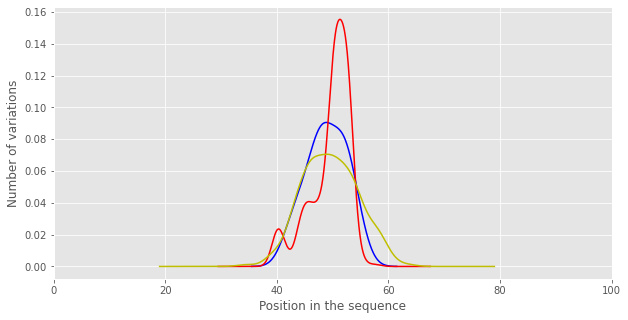

In [ ]:

vars_G2 
vars_G3
vars_all

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (10,5))

vars_G1.pos.plot.kde(c = 'b', ax = ax)
# vars_test.pos.plot.kde(c = 'y', ax = ax)
vars_G5.pos.plot.kde(c = 'r', ax = ax)
vars_test.pos.plot.kde(c = 'y', ax = ax)

# vars_G7.pos.plot.kde(c = 'r', ax = ax)
# ax.legend(labels=['New genetic variations'], frameon=False)
plt.xlabel("Position in the sequence")
plt.ylabel("Number of variations")
ax.set_xlim(0,100)

In [ ]:
vars_test

,ref,tar,pos
52,A,C,52
50,T,A,50
45,C,A,45
55,T,A,55
57,T,A,57
...,...,...,...
50,T,G,50
55,T,A,55
51,A,G,51
59,A,T,59
